### Data: National Health & Nutrition Examination Survey (2017-18)

https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2017

Size of data is about 31 MB

The reason why I picked this dataset was because I am curious about having a better and a holistic understanding of human health.

The questions I have in mind are:

- Is there a relationship between the childhood trauma/developmental trauma and adulthood diseases/mental health?
- How are autoimmune conditions and sensitivites to pain related?
- How often do the patients change their medications?

Below, I just present the data extracted from multiple data sources on https://wwwn.cdc.gov/nchs/nhanes for the following categories:

- Laboratory data
- Examination data
- Demographics data
- Dietary data
- Questionaire data

In [1]:
import pandas as pd
import numpy as np
categories = ['Questionnaire', 'Laboratory', 'Examination', 'Demographics', 'Dietary']
base_url = 'https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/'

def read_data(cat):
    main_url = 'https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=%s&CycleBeginYear=2017'%cat
    DF = pd.read_html(main_url, index_col=0)[0]
    DF['u']= DF['Data File'].str.split('Data').str[0].str.strip()+'.XPT'
    DF['size'] = DF['Data File'].str.split('-').str[1].str.strip(']').str.strip()
    DF['category'] = cat
    return DF[['category', 'u', 'size']]

def read_url_for_field(field):
    u = result.loc[field]['u']
    url = '%s%s'%(base_url, u)
    df = pd.read_sas(url) 
    return df

frames = [read_data(cat) for cat in categories]
result = pd.concat(frames)

Extracted all the dataframes: 

In [2]:
result

,category,u,size
Data File Name,,,
Acculturation,Questionnaire,ACQ_J.XPT,396.3 KB
Alcohol Use,Questionnaire,ALQ_J.XPT,434.4 KB
Audiometry,Questionnaire,AUQ_J.XPT,3.9 MB
Blood Pressure & Cholesterol,Questionnaire,BPQ_J.XPT,531.8 KB
Cardiovascular Health,Questionnaire,CDQ_J.XPT,518.7 KB
...,...,...,...
"Dietary Supplement Use 24-Hour - Individual Dietary Supplements, Second Day",Dietary,DS2IDS_J.XPT,3.2 MB
"Dietary Supplement Use 24-Hour - Total Dietary Supplements, First Day",Dietary,DS1TOT_J.XPT,3.3 MB
"Dietary Supplement Use 24-Hour - Total Dietary Supplements, Second Day",Dietary,DS2TOT_J.XPT,3.3 MB


In [3]:
result.index

Index(['Acculturation', 'Alcohol Use', 'Audiometry',
       'Blood Pressure & Cholesterol', 'Cardiovascular Health',
       'Consumer Behavior', 'Current Health Status', 'Dermatology', 'Diabetes',
       'Diet Behavior & Nutrition', 'Disability', 'Drug Use',
       'Early Childhood', 'Health Insurance', 'Hepatitis',
       'Hospital Utilization & Access to Care', 'Housing Characteristics',
       'Immunization', 'Income', 'Kidney Conditions - Urology',
       'Medical Conditions', 'Mental Health - Depression Screener',
       'Occupation', 'Oral Health', 'Osteoporosis', 'Pesticide Use',
       'Physical Activity', 'Physical Activity - Youth',
       'Physical Functioning', 'Prescription Medications',
       'Preventive Aspirin Use', 'Reproductive Health', 'Sleep Disorders',
       'Smoking - Cigarette Use', 'Smoking - Household Smokers',
       'Smoking - Recent Tobacco Use', 'Smoking - Secondhand Smoke Exposure',
       'Volatile Toxicant', 'Weight History', 'Weight History - Youth',


In [4]:
Prescription_Medications = read_url_for_field('Prescription Medications')
Mental_Health_Depression_Screener = read_url_for_field('Mental Health - Depression Screener')
Medical_Conditions = read_url_for_field('Medical Conditions') 
Disability = read_url_for_field('Disability') 

### Prescription Medications

In [5]:
Prescription_Medications.head()

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,93703.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN
1,93704.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN
2,93705.0,1.0,b'ENALAPRIL; HYDROCHLOROTHIAZIDE',b'd03740',1.0,5475.0,b'I10',b'',b'',b'Essential (primary) hypertension',b'',b'',3.0
3,93705.0,1.0,b'MELOXICAM',b'd04532',1.0,61.0,b'M06.9',b'',b'',"b'Rheumatoid arthritis, unspecified'",b'',b'',3.0
4,93705.0,1.0,b'OMEPRAZOLE',b'd00325',1.0,3650.0,b'R12',b'',b'',b'Heartburn',b'',b'',3.0


### Mental Health - Depression Screener

In [6]:
Mental_Health_Depression_Screener.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,93705.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
1,93706.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
2,93708.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
3,93709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93711.0,1.000000e+00,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


### Medical Conditions

In [7]:
Medical_Conditions.head()

,SEQN,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,...,MCQ300A,MCQ366A,MCQ366B,MCQ366C,MCQ366D,MCQ371A,MCQ371B,MCQ371C,MCQ371D,OSQ230
0,93703.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,1.0,10.0,2.0,NaN,NaN,NaN,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0
3,93706.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,...,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
4,93707.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Examination

In [8]:
result[result['category']=='Examination']

,category,u,size
Data File Name,,,
Blood Pressure,Examination,BPX_J.XPT,1.4 MB
Blood Pressure - Oscillometric Measurements,Examination,BPXO_J.XPT,678.1 KB
Body Measures,Examination,BMX_J.XPT,1.4 MB
Dual-Energy X-ray Absorptiometry - Femur,Examination,DXXFEM_J.XPT,456.2 KB
Dual-Energy X-ray Absorptiometry - Spine,Examination,DXXSPN_J.XPT,547.4 KB
Dual-Energy X-ray Absorptiometry - Whole Body,Examination,DXX_J.XPT,3.6 MB
Liver Ultrasound Transient Elastography,Examination,LUX_J.XPT,677.8 KB
Oral Health - Dentition,Examination,OHXDEN_J.XPT,8.9 MB
Oral Health - Recommendation of Care,Examination,OHXREF_J.XPT,786.7 KB


### Questionnaire

In [9]:
result[result['category']=='Questionnaire']

,category,u,size
Data File Name,,,
Acculturation,Questionnaire,ACQ_J.XPT,396.3 KB
Alcohol Use,Questionnaire,ALQ_J.XPT,434.4 KB
Audiometry,Questionnaire,AUQ_J.XPT,3.9 MB
Blood Pressure & Cholesterol,Questionnaire,BPQ_J.XPT,531.8 KB
Cardiovascular Health,Questionnaire,CDQ_J.XPT,518.7 KB
Consumer Behavior,Questionnaire,CBQ_J.XPT,435.4 KB
Current Health Status,Questionnaire,HSQ_J.XPT,590.2 KB
Dermatology,Questionnaire,DEQ_J.XPT,242.4 KB
Diabetes,Questionnaire,DIQ_J.XPT,3.7 MB


### Medication for Depression & Thyroid Problem

https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Questionnaire&CycleBeginYear=2017

In [10]:
medication_for_depression = Disability[["DLQ150"]].astype('Int64')

In [11]:
thyroid_problem = Medical_Conditions[['MCQ160M']].astype('Int64')

In [12]:
df = (medication_for_depression
 .join(thyroid_problem)
 .rename(columns={'MCQ160M':'Thyroid Problem', 'DLQ150':'Depression Medications'})
 .replace(np.nan, 0)
)
df

,Depression Medications,Thyroid Problem
0,0,0
1,0,0
2,2,2
3,2,0
4,0,0
...,...,...
8892,2,2
8893,2,2
8894,2,2
8895,0,0


In [13]:
CrosstabResult=pd.crosstab(index=df['Depression Medications'],columns=df['Thyroid Problem'])

In [14]:
CrosstabResult

Thyroid Problem,0,1,2,7,9
Depression Medications,,,,,
0,3046,17,71,0,1
1,7,118,456,0,2
2,275,520,4368,2,9
9,0,0,4,0,1


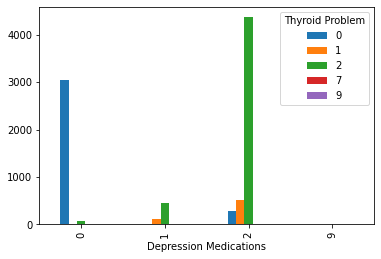

In [18]:
import matplotlib
%matplotlib inline
CrosstabResult.plot.bar();